
<h3 style="color:blue;">Pour construire un model de machine learning on doit suivre les étapes suivantes :</h3>

1.   Gathering data

2.   Data pre-processing

3.   Researching the model that will be best for the type of data

4.   Training and testing the model

5.   Evaluation

###Première étape :

---

*   La collection des données peut etre faite de nombreuse source, on va donner un exemple pour chaque source .







<h2>- Google Drive to Colab</h2>
<center><img src="https://www.workflowmax.com/hs-fs/hub/325051/file-491855201.jpg"></center>

In [0]:
from google.colab import drive

In [0]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


<h2>- PC to Colab</h2>
<center><img src="https://img.icons8.com/cotton/2x/computer.png"></img></center>

In [0]:
from google.colab import files
uploaded = files.upload()

<h2 style="color:blue;">- Kaggle to Colab</h2>
<center><img src="https://upload.wikimedia.org/wikipedia/commons/7/7c/Kaggle_logo.png"></center>

In [0]:
#Installation de la library kaggle
!pip install -q kaggle

In [0]:
#création du dossier caché .kaggle
!mkdir -p ~/.kaggle

In [10]:
#importation du fichier kaggle.json
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [0]:
#copie du fichier kaggle.json dans le dossier caché .kaggle
!cp kaggle.json ~/.kaggle/

In [0]:
#changement du mode d'acces au fichier kaggle.json au monde 600
!chmod 600 /root/.kaggle/kaggle.json

In [13]:
#téléchargement des datasets :
#"melbourne-housing-snapshot"
!kaggle datasets download -d dansbecker/melbourne-housing-snapshot
#"cat & dog"
!kaggle datasets download -d tongpython/cat-and-dog

  0% 0.00/451k [00:00<?, ?B/s]
100% 451k/451k [00:00<00:00, 61.3MB/s]
 96% 210M/218M [00:04<00:00, 51.4MB/s]
100% 218M/218M [00:04<00:00, 54.1MB/s]


<h2>- Web to Colab</h2>
<center><img src="https://disenowebakus.net/en/images/articles/difference-between-internet-and-web-www-services.jpg"></center>

In [14]:
#téléchargement d'un dataset depuis internet
!wget "http://www.ers.usda.gov/data-products/food-consumption-and-nutrient-intakes/documentation.aspx"
#téléchargement tout en spécifiant le nom du fichier
!wget -O "http://www.ers.usda.gov/data-products/food-consumption-and-nutrient-intakes/documentation.aspx" "documentation.aspx"

--2019-10-08 11:02:39--  http://www.ers.usda.gov/data-products/food-consumption-and-nutrient-intakes/documentation.aspx
Resolving www.ers.usda.gov (www.ers.usda.gov)... 13.72.9.120
Connecting to www.ers.usda.gov (www.ers.usda.gov)|13.72.9.120|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.ers.usda.gov/data-products/food-consumption-and-nutrient-intakes/documentation.aspx [following]
--2019-10-08 11:02:39--  https://www.ers.usda.gov/data-products/food-consumption-and-nutrient-intakes/documentation.aspx
Connecting to www.ers.usda.gov (www.ers.usda.gov)|13.72.9.120|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 511428 (499K) [text/html]
Saving to: ‘documentation.aspx’

documentation.aspx  100%[===================>] 499.44K  1.12MB/s    in 0.4s    

2019-10-08 11:02:40 (1.12 MB/s) - ‘documentation.aspx’ saved [511428/511428]



<center><h3>Deuxième étape</h3></center>

---


 
 

*   Cette étapes peut être effectuée en 2 actions :
  

        1.  Explore
        2.  Prepare
        


  

## 1-  Explore




#   A- Les Fichiers CSV 

In [15]:
# Decompression du fichier Zip 
!unzip melbourne-housing-snapshot.zip

Archive:  melbourne-housing-snapshot.zip
  inflating: melb_data.csv           


In [0]:
import pandas as pd

# read the data and store data in a DataFrame 
houses_data = pd.read_csv("/content/melb_data.csv")

In [17]:
# print a summary of the data 
houses_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [18]:
# print the first lines  of the data 
houses_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [19]:
# print the last lines  of the data 
houses_data.tail()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,4.0,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,3.0,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0
13579,Yarraville,6 Agnes St,4,h,1285000.0,SP,Village,26/08/2017,6.3,3013.0,4.0,1.0,1.0,362.0,112.0,1920.0,NaN,-37.81188,144.88449,Western Metropolitan,6543.0


In [0]:
# Select few culomns of the data 
feature_names = ["Rooms","Landsize","Bathroom","YearBuilt","Price"]

Selected_data = houses_data[feature_names]

In [21]:
Selected_data.head()

,Rooms,Landsize,Bathroom,YearBuilt,Price
0,2,202.0,1.0,NaN,1480000.0
1,2,156.0,1.0,1900.0,1035000.0
2,3,134.0,2.0,1900.0,1465000.0
3,3,94.0,2.0,NaN,850000.0
4,4,120.0,1.0,2014.0,1600000.0


#   B- Les images

In [22]:
# Decompression du fichier Zip 
!unzip cat-and-dog.zip

Archive:  cat-and-dog.zip
  inflating: test_set/test_set/cats/_DS_Store  
  inflating: test_set/test_set/cats/cat.4001.jpg  
  inflating: test_set/test_set/cats/cat.4002.jpg  
  inflating: test_set/test_set/cats/cat.4003.jpg  
  inflating: test_set/test_set/cats/cat.4004.jpg  
  inflating: test_set/test_set/cats/cat.4005.jpg  
  inflating: test_set/test_set/cats/cat.4006.jpg  
  inflating: test_set/test_set/cats/cat.4007.jpg  
  inflating: test_set/test_set/cats/cat.4008.jpg  
  inflating: test_set/test_set/cats/cat.4009.jpg  
  inflating: test_set/test_set/cats/cat.4010.jpg  
  inflating: test_set/test_set/cats/cat.4011.jpg  
  inflating: test_set/test_set/cats/cat.4012.jpg  
  inflating: test_set/test_set/cats/cat.4013.jpg  
  inflating: test_set/test_set/cats/cat.4014.jpg  
  inflating: test_set/test_set/cats/cat.4015.jpg  
  inflating: test_set/test_set/cats/cat.4016.jpg  
  inflating: test_set/test_set/cats/cat.4017.jpg  
  inflating: test_set/test_set/cats/cat.4018.jpg  
  inflat

uint8
(292, 269, 3)


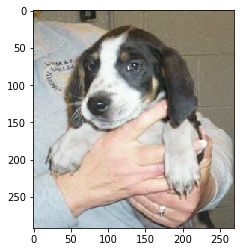

In [23]:
# load and display an image with Matplotlib
from matplotlib import image
from matplotlib import pyplot

# load image as pixel array
data = image.imread('/content/training_set/training_set/dogs/dog.10.jpg')
# summarize shape of the pixel array
print(data.dtype)
print(data.shape)


# display the array of pixels as an image
pyplot.imshow(data)
pyplot.show()

In [0]:
import os 

#stockage des chemins

training_path ="/content/training_set/training_set"

dogs_train = sorted([os.path.join(training_path, 'dogs', file)
         for file in os.listdir(training_path + "/dogs") if file.endswith('.jpg')])

cats_train = sorted([os.path.join(training_path, 'cats', file)
         for file in os.listdir(training_path + "/cats") if file.endswith('.jpg')])


test_path ="/content/test_set/test_set"

dogs_test = sorted([os.path.join(test_path, 'dogs', file)
         for file in os.listdir(test_path + "/dogs") if file.endswith('.jpg')])

cats_test = sorted([os.path.join(test_path, 'cats', file)
         for file in os.listdir(test_path + "/cats") if file.endswith('.jpg')])
 

In [0]:
import cv2

#import images using paths

dogs_train_img = [cv2.imread(i, cv2.IMREAD_UNCHANGED) for i in dogs_train]

cats_train_img = [cv2.imread(i, cv2.IMREAD_UNCHANGED) for i in cats_train]


dogs_test_img = [cv2.imread(i, cv2.IMREAD_UNCHANGED) for i in dogs_test]

cats_test_img = [cv2.imread(i, cv2.IMREAD_UNCHANGED) for i in cats_test]

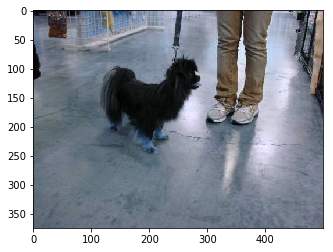

In [26]:
pyplot.imshow(dogs_train_img[3])
pyplot.show()

## 2-  Prepare:

In [0]:

# Resize function
   
def resize_data(img):
    # setting dim of the resize
    height = 220
    width = 220
    dim = (width, height)
    res_img = []
    print('Original size',img[0].shape)
    for i in range(len(img)):
        res = cv2.resize(img[i], dim, interpolation=cv2.INTER_LINEAR)
        res_img.append(res)

    # Checcking the size
    print("RESIZED", res_img[1].shape)
    return res_img

Original size (499, 327, 3)
RESIZED (220, 220, 3)
Original size (280, 300, 3)
RESIZED (220, 220, 3)
Original size (499, 421, 3)
RESIZED (220, 220, 3)
Original size (415, 498, 3)
RESIZED (220, 220, 3)


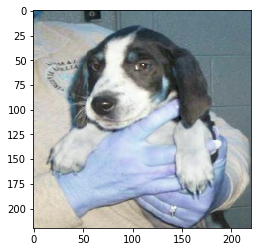

In [28]:
import numpy as np 

#Resizer les images en (220, 220, 3)
resized_dogs_train = np.array(resize_data(dogs_train_img))
resized_cats_train = np.array(resize_data(cats_train_img))
resized_dogs_test = np.array(resize_data(dogs_test_img))
resized_cats_test = np.array(resize_data(cats_test_img))


pyplot.imshow(resized_dogs_train[1])
pyplot.show()

![Texte alternatif…](https://process.filestackapi.com/cache=expiry:max/resize=width:1050/jvbsG1EPRXWFGnoPxB0G)

In [29]:
#Discover data form

print('dogs train',(resized_dogs_train).shape)
print('cats train',(resized_cats_train).shape)
print('dogs test',(resized_dogs_test).shape)
print('cats test',(resized_cats_test).shape)


dogs train (4005, 220, 220, 3)
cats train (4000, 220, 220, 3)
dogs test (1012, 220, 220, 3)
cats test (1011, 220, 220, 3)


In [0]:
#Labelling data                Dogs => 1, Cats => 0


train_x = np.concatenate((resized_dogs_train, resized_cats_train), axis=0) 
train_y = np.concatenate((np.ones(4005), np.zeros(4000)), axis=0)   

test_x = np.concatenate((resized_dogs_test, resized_cats_test), axis=0) 
test_y = np.concatenate((np.ones(1012), np.zeros(1011)), axis=0)   

In [31]:
print(' train x',(train_x).shape)
print('train y',(train_y).shape)
print('test x',(test_x).shape)
print('test y',(test_y).shape)

 train x (8005, 220, 220, 3)
train y (8005,)
test x (2023, 220, 220, 3)
test y (2023,)
